In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal

In [8]:
total_acc_x = pd.read_csv("./UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt", header=None, sep='\s+')
total_acc_y = pd.read_csv("./UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt", header=None, sep='\s+')
total_acc_z = pd.read_csv("./UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt", header=None, sep='\s+')
print ("Shape of data", total_acc_x.shape)

Shape of data (7352, 128)


### Part A
Step detection is the most common output of the ubiquitous activity recognition apps and wearable
devices. Although many sophisticated algorithms exist, the basic concept in all those methods is to
find the peaks and count them.
Apply different peak finding methods described in the link below on the accelerometer data. You can
choose to focus on just one axis which has the highest variations in acceleration. Report your views
on their effectiveness and which one is favorable for this dataset.
https://github.com/MonsieurV/py-findpeaks#detect_peaks-from-marcos-duarte You
will find the documention and sample code of each peak detection algorithm by clicking on the link
under each graph (in the above github page)

In [14]:
print ("Max std in x axis: ",max(total_acc_x.std()))
print ("Max std in y axis: ",max(total_acc_y.std()))
print ("Max std in z axis: ",max(total_acc_z.std()))
print ("Therefore, x axis has the maximum standard deviation.")

Max std in x axis:  0.4178751047992486
Max std in y axis:  0.3942287055992441
Max std in z axis:  0.3602688629166704
Therefore, x axis has the maximum standard deviation


In [15]:
#Find the row with the highest std in X axis to focus on
highest_var_axis=total_acc_x.std(axis=1)[total_acc_x.std(axis=1)==total_acc_x.std(axis=1).max()].index[0]
focus_axis=total_acc_x.iloc[highest_var_axis,:]

Find the row with the highest std in X axis to focus on


#### Method 1: scipy.signal.find_peaks

Peaks are: [  2  10  15  23  25  34  46  48  57  66  71  76  79  89  91  99 108 111
 114 122]


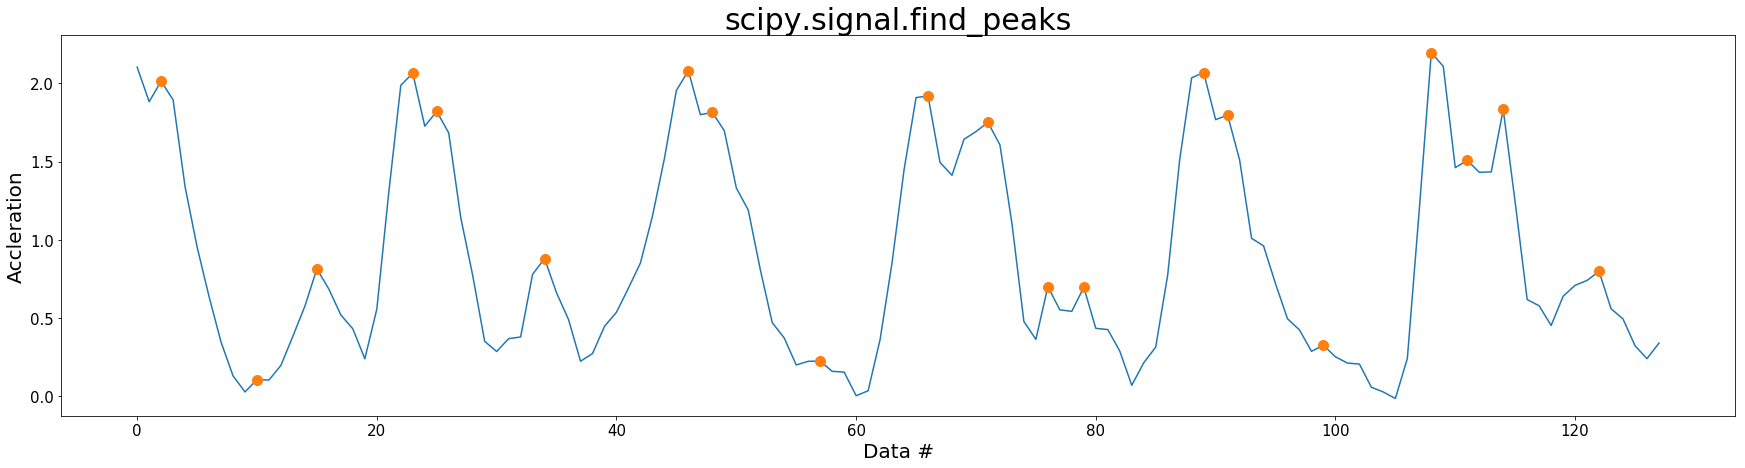

In [42]:
indexes, _ = scipy.signal.find_peaks(focus_axis)
print('Peaks are: %s' % (indexes))
fig, ax = plt.subplots(figsize=(30,7))
plt.plot(focus_axis)
plt.plot(indexes, focus_axis[indexes], marker="o", ls="",ms=10)
plt.ylabel("Accleration",fontsize=20)
plt.xlabel("Data #",fontsize=20)
plt.tick_params(labelsize=15)
plt.title("scipy.signal.find_peaks",fontsize=30)
plt.show()

#### Method 2: scipy.signal.find_peaks

c:\users\jing yun\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Peaks are: [  2  23  34  46  67  78  89 110]


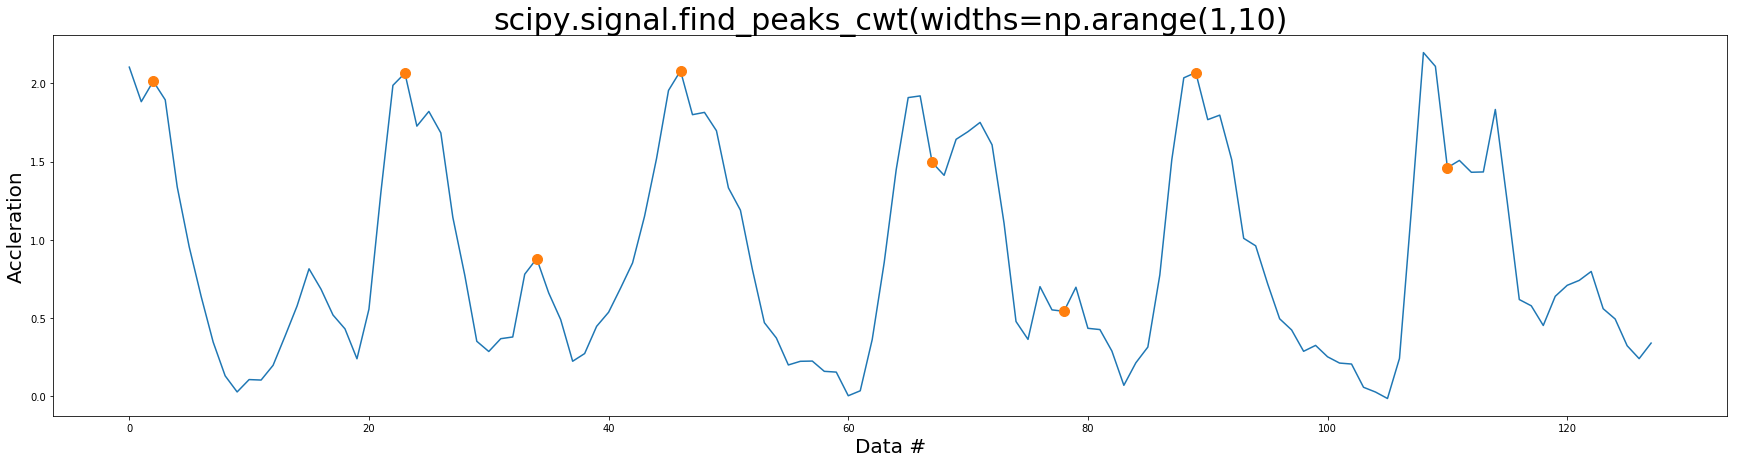

Peaks are: [  2  23  34  46  67  78  89 110]


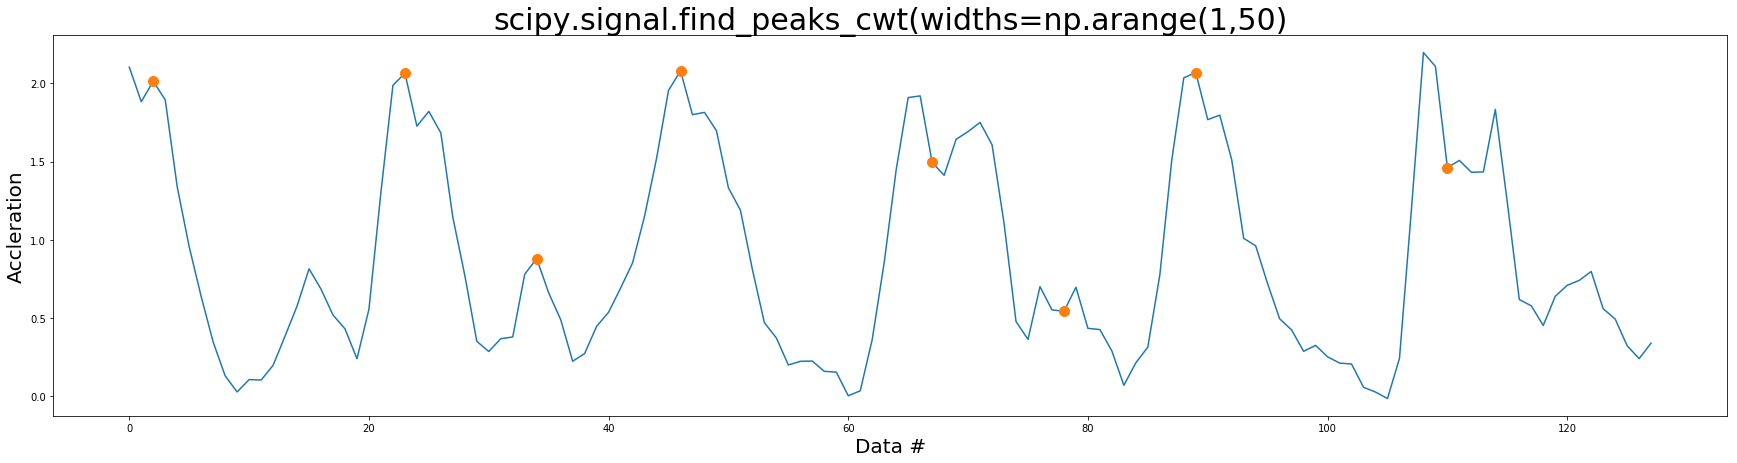

Peaks are: [  2  23  34  46  67  78  89 110]


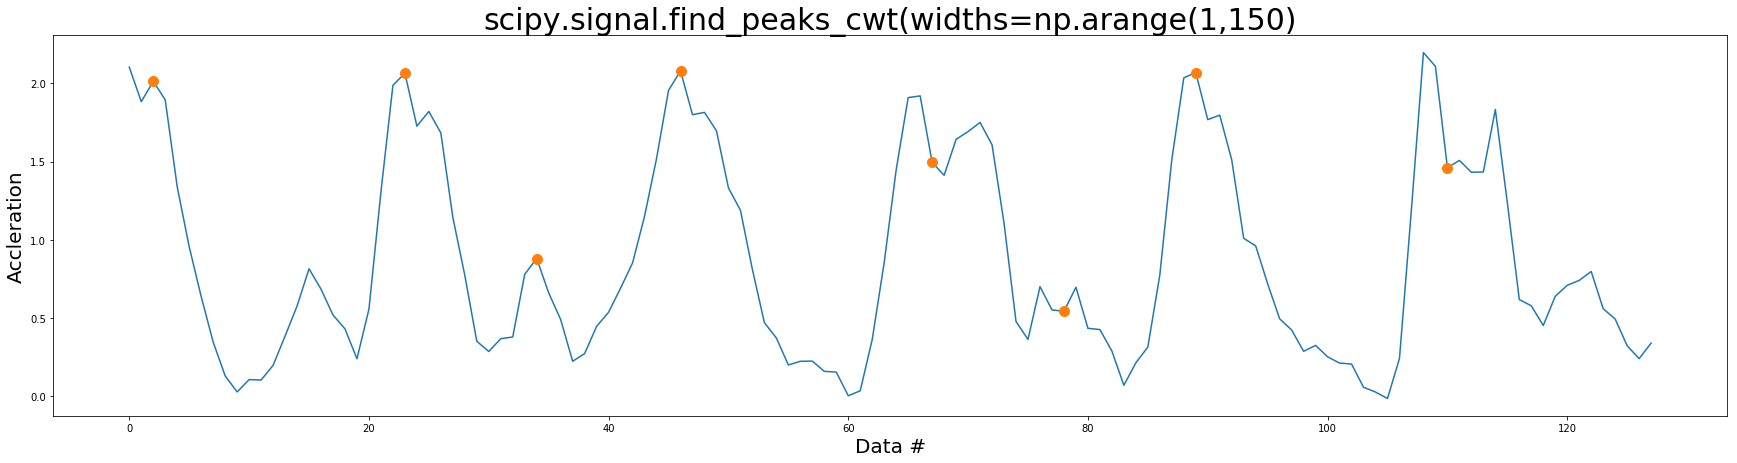

Peaks are: [  2  23  34  46  67  78  89 110]


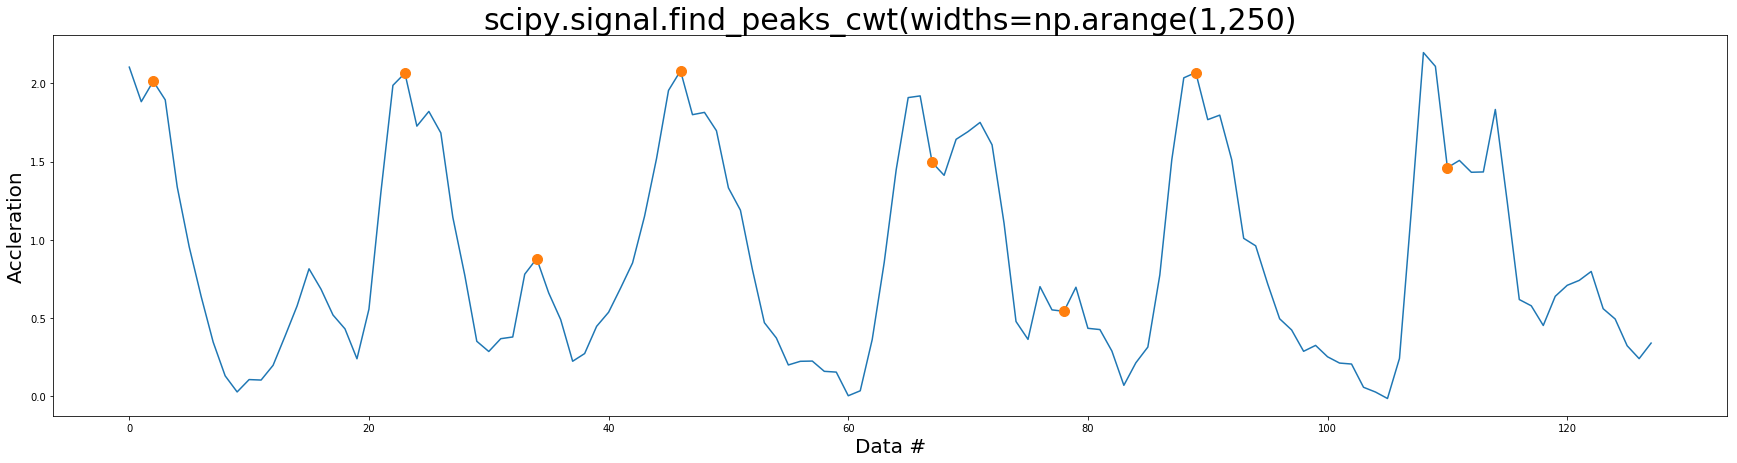

In [41]:
indexes = scipy.signal.find_peaks_cwt(vector=focus_axis.values,widths=np.arange(1,10))
indexes = np.array(indexes) - 1
print('Peaks are: %s' % (indexes))
fig, ax = plt.subplots(figsize=(30,7))
plt.plot(focus_axis)
plt.plot(indexes, focus_axis[indexes], marker="o", ls="",ms=10)
plt.ylabel("Accleration",fontsize=20)
plt.xlabel("Data #",fontsize=20)
plt.title("scipy.signal.find_peaks_cwt(widths=np.arange(1,10)",fontsize=30)
plt.show()
for i in range(50,301,100): ### modify the widths here ###
    indexes = scipy.signal.find_peaks_cwt(vector=focus_axis.values,widths=np.arange(1,10))
    indexes = np.array(indexes) - 1
    print('Peaks are: %s' % (indexes))
    fig, ax = plt.subplots(figsize=(30,7))
    plt.plot(focus_axis)
    plt.plot(indexes, focus_axis[indexes], marker="o", ls="",ms=10)
    plt.ylabel("Accleration",fontsize=20)
    plt.xlabel("Data #",fontsize=20)
    plt.title('scipy.signal.find_peaks_cwt(widths=np.arange(1,{})'.format(i),fontsize=30)
    plt.show()
#only identify peaks above (only a few are at local maxima of peaks, not very accurate)

#### Method 3: scipy.signal.argrelextrema

Peaks are: [ 23  46  66  89 108]


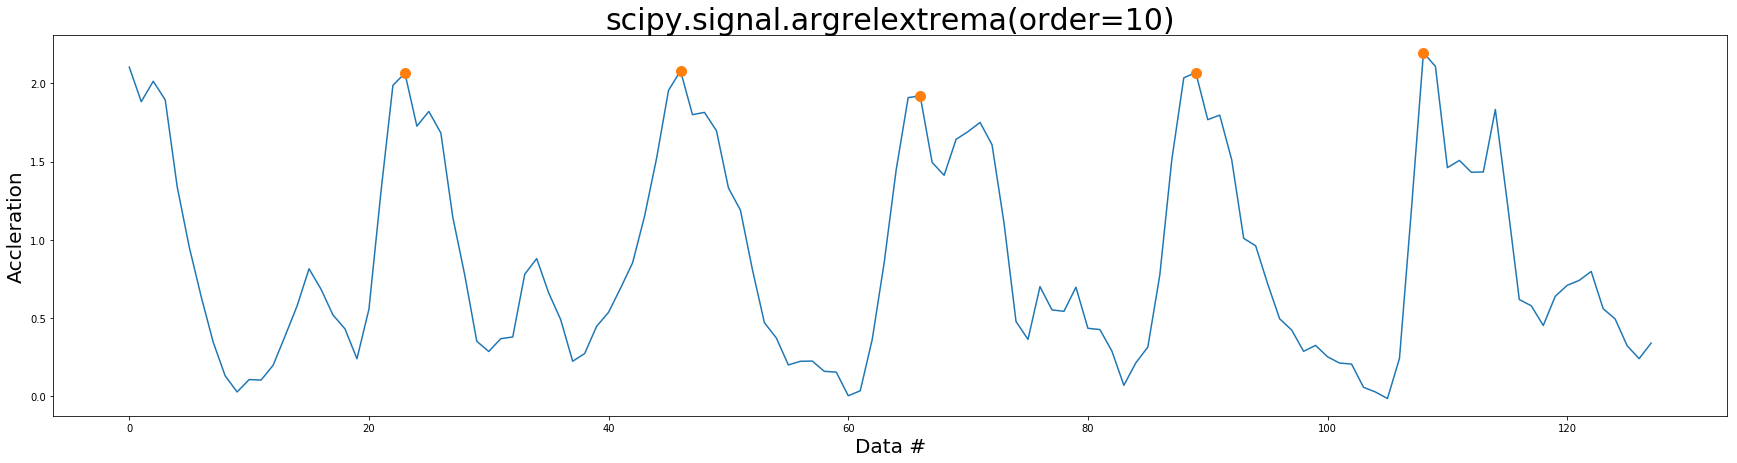

c:\users\jing yun\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Peaks are: [  2  23  34  46  67  78  89 110]


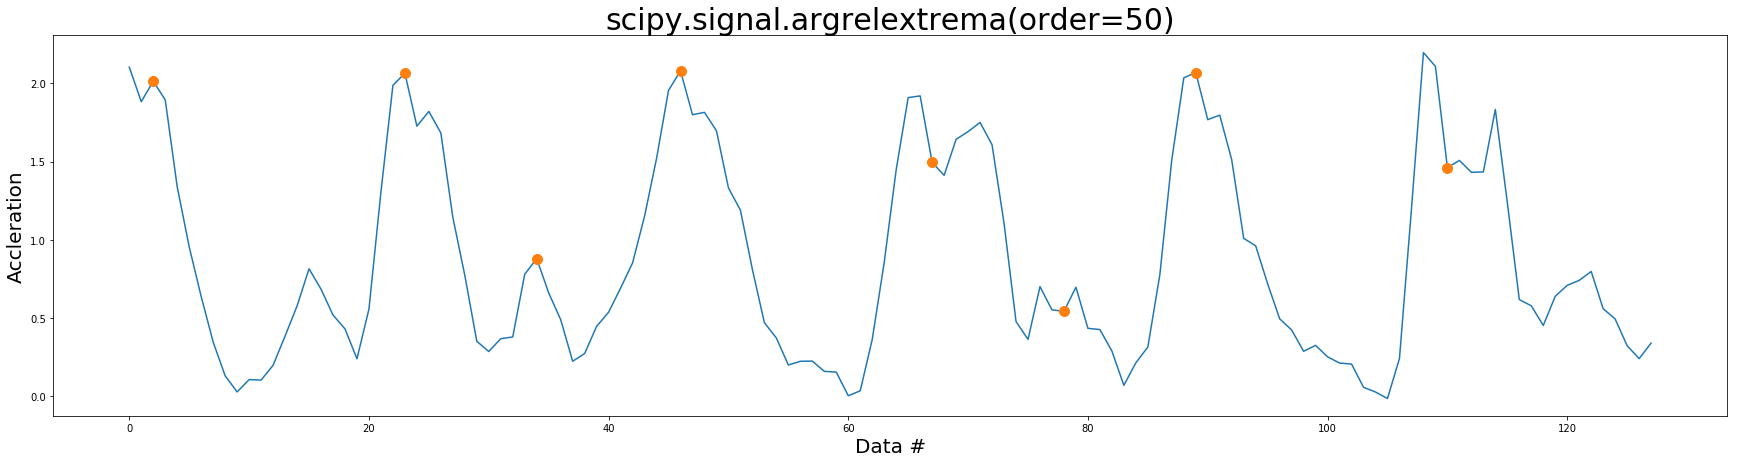

Peaks are: [  2  23  34  46  67  78  89 110]


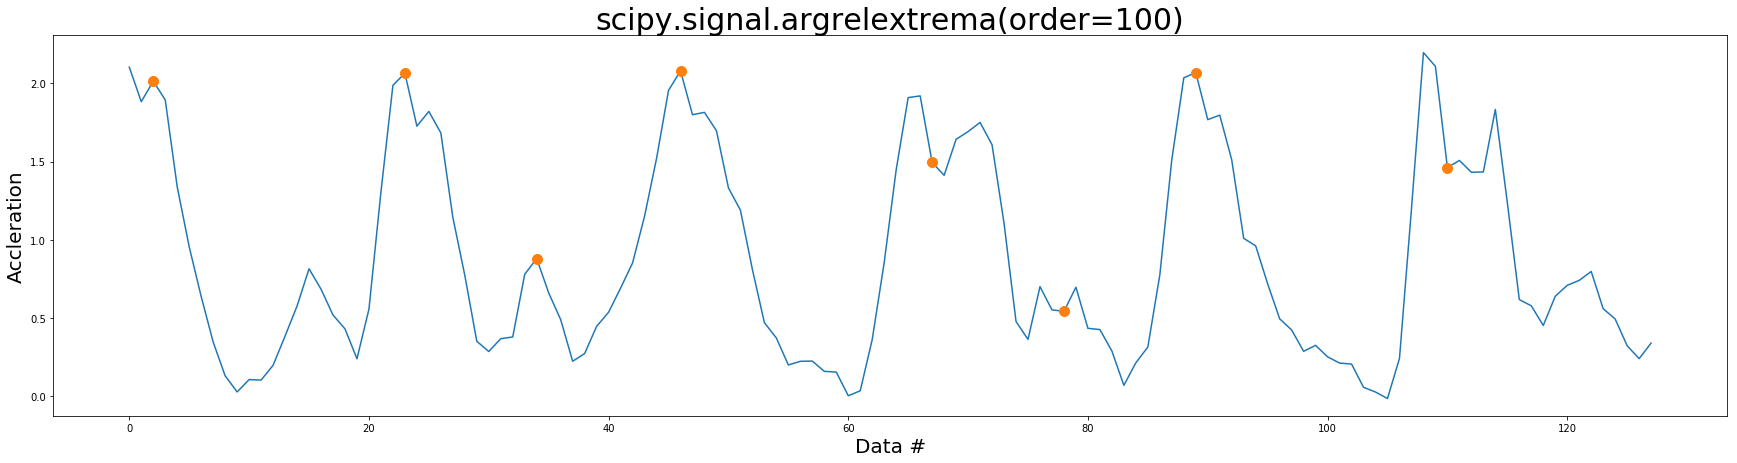

Peaks are: [  2  23  34  46  67  78  89 110]


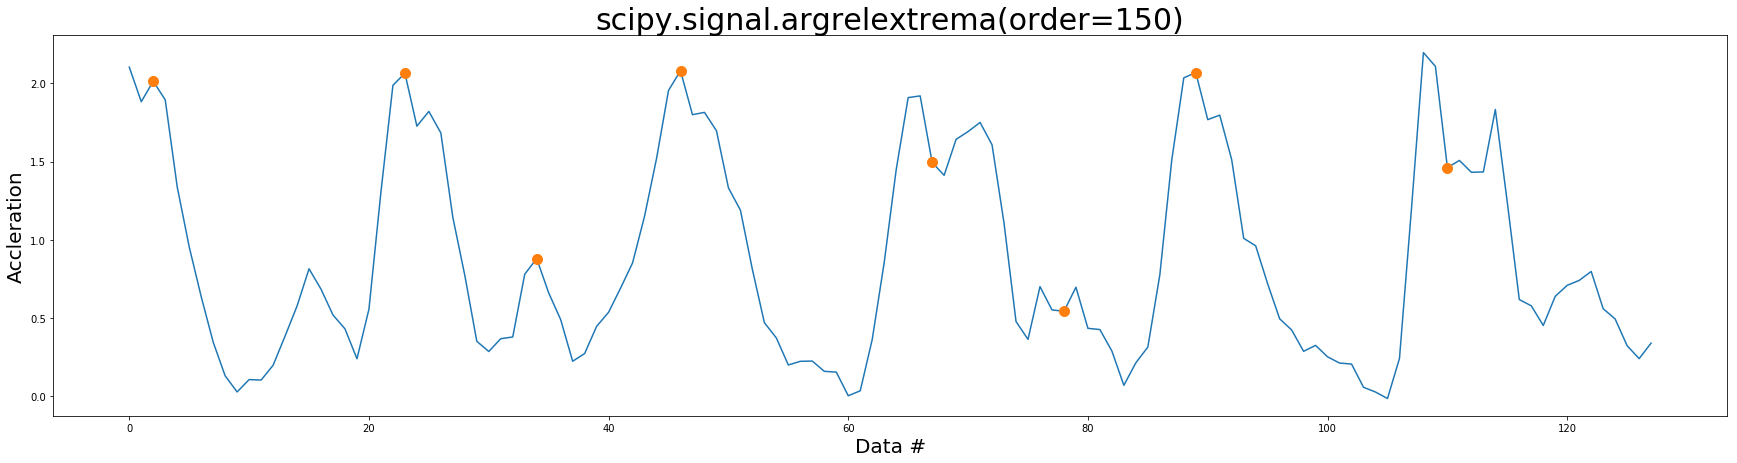

In [36]:
indexes = scipy.signal.argrelextrema(data=focus_axis.values,comparator=np.greater,order=10)
#indexes returns a tuple, make it a list;
indexes = indexes[0]
print('Peaks are: %s' % (indexes))
fig, ax = plt.subplots(figsize=(30,7))
plt.plot(focus_axis)
plt.plot(indexes, focus_axis[indexes], marker="o", ls="",ms=10)
plt.ylabel("Accleration",fontsize=20)
plt.xlabel("Data #",fontsize=20)
plt.title("scipy.signal.argrelextrema(order=10)",fontsize=30)
plt.show()
for i in range(50,151,50): ### modify the order here ###
    indexes = scipy.signal.find_peaks_cwt(vector=focus_axis.values,widths=np.arange(1,10))
    indexes = np.array(indexes) - 1
    print('Peaks are: %s' % (indexes))
    fig, ax = plt.subplots(figsize=(30,7))
    plt.plot(focus_axis)
    plt.plot(indexes, focus_axis[indexes], marker="o", ls="",ms=10)
    plt.ylabel("Accleration",fontsize=20)
    plt.xlabel("Data #",fontsize=20)
    plt.title('scipy.signal.argrelextrema(order={})'.format(i),fontsize=30)
    plt.show()
#can get 'cleaner' peaks by increaing order, 

### Part B
Accelerometer data is fairly noisy especially the high frequency components interfere with the signals
of our interest (i.e., those corresponding to user steps).
Apply a low-pass and high-pass band filter to the raw data. You can choose to focus on just one axis
which has the highest variations in acceleration. Report which of the filters is better for our data set
and task. Note that different filters are readily supported by SciPy module.
https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.
butter.html#scipy.signal.butter

From the README we know that: sampling rate is 50 Hz . Therefore: <br/>
nyquist is 25 Hz <br/>
therefore 1 in Wn scipy.butter = 25Hz <br/>
for a corner frequency of 0.3, Wn must be 0.3/25

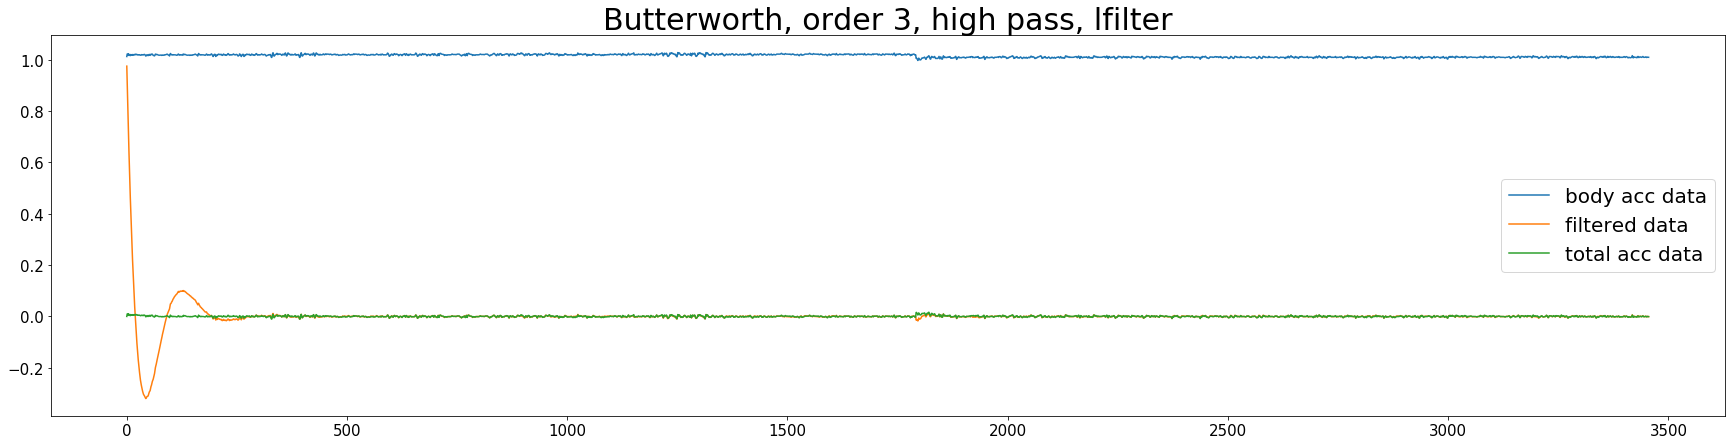

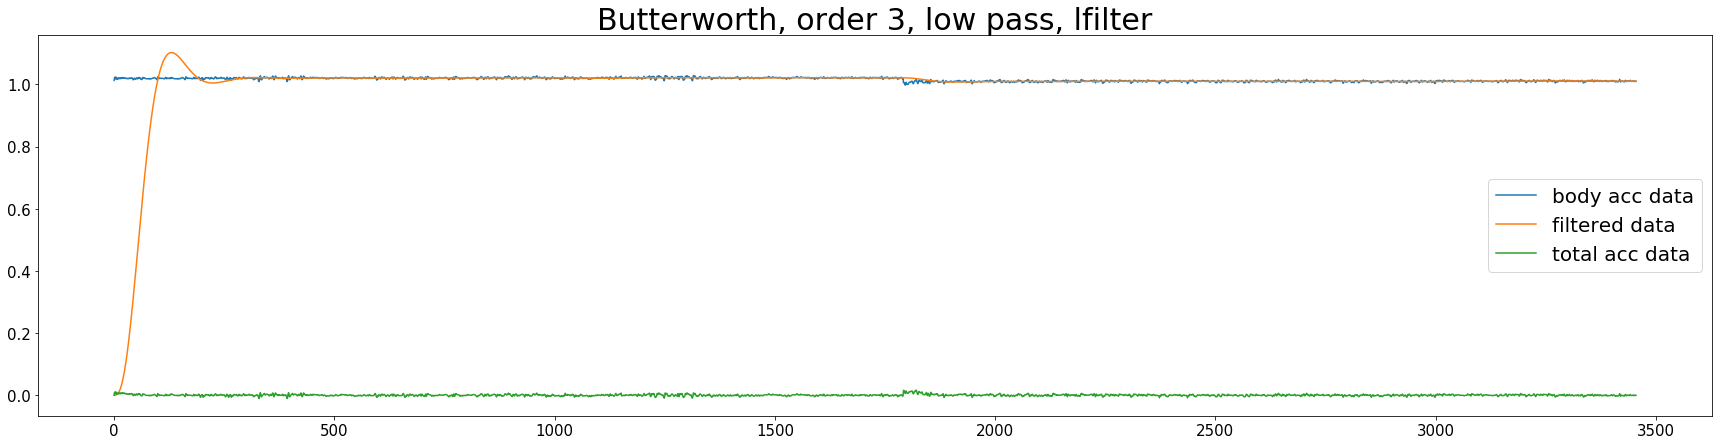

In [76]:
data=np.concatenate((total_acc_x.iloc[0,:].values,total_acc_x.iloc[1,:].values))
body=np.concatenate((body_acc_x.iloc[0,:].values,body_acc_x.iloc[1,:].values))
for i in range(2,27): #27 because its the same activity conducted by the same subject
    data=np.concatenate((data,total_acc_x.iloc[i,:].values))
    body=np.concatenate((body,body_acc_x.iloc[i,:].values))
#filter out interference from gravity which is considered to be low frequency 
b,a = scipy.signal.butter(N=3,Wn=0.012,btype='high')
#butter returns b,a denominator an numerator of IIR filter, use lfilter to process this data
y = scipy.signal.lfilter(b,a,data)
fig, ax = plt.subplots(figsize=(30,7))
plt.plot(data, label='body acc data')
plt.plot(y, label='filtered data')
plt.plot(body,  label='total acc data')
#plt.xlim(0,120)
plt.tick_params(labelsize=15)
#plt.ylim(-.025,0.025)
plt.title('Butterworth, order 3, high pass, lfilter',fontsize=30)
plt.legend(prop={'size': 20})
plt.show()

### try a low pass filter ### 
b,a = scipy.signal.butter(N=3,Wn=0.012,btype='low')
#butter returns b,a denominator an numerator of IIR filter, use lfilter to process this data
y = scipy.signal.lfilter(b,a,data)
fig, ax = plt.subplots(figsize=(30,7))
plt.plot(data, label='body acc data')
plt.plot(y, label='filtered data')
plt.plot(body,  label='total acc data')
#plt.xlim(0,120)
plt.tick_params(labelsize=15)
#plt.ylim(-.025,0.025)
plt.title('Butterworth, order 3, low pass, lfilter',fontsize=30)
plt.legend(prop={'size': 20})
plt.show()

Low pass filter seems to make the data approach the filtered data (body acc data)

### Part C
We notice many derived features in the activity recognition data set.
Write code to recreate some of those time-domain features features such as mean, standard deviation,
kurtosis and signal magnitude area from the raw data. Report (by visual investigation) whether some
of the features (e.g., SMA) have the potential to discriminate between multiple activities. Note: The
derived data set uses fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window)
is used to generate the features.

In [56]:
df_x_train = pd.read_csv(".\\UCI HAR Dataset\\train\\X_train.txt", header=None, sep='\s+')
body_acc_x = pd.read_csv(".\\UCI HAR Dataset\\train\\Inertial Signals\\body_acc_x_train.txt", header=None, sep='\s+')
body_acc_y = pd.read_csv(".\\UCI HAR Dataset\\train\\Inertial Signals\\body_acc_y_train.txt", header=None, sep='\s+')
body_acc_z = pd.read_csv(".\\UCI HAR Dataset\\train\\Inertial Signals\\body_acc_z_train.txt", header=None, sep='\s+')
df_y_train = pd.read_csv(".\\UCI HAR Dataset\\train\\y_train.txt", header=None, sep='\s+')
activity_labels = pd.read_csv(".\\UCI HAR Dataset\\activity_labels.txt",header=None, sep='\s+')

#### Recreating and Investigating the feature: tBodyAcc-Mean for X axis

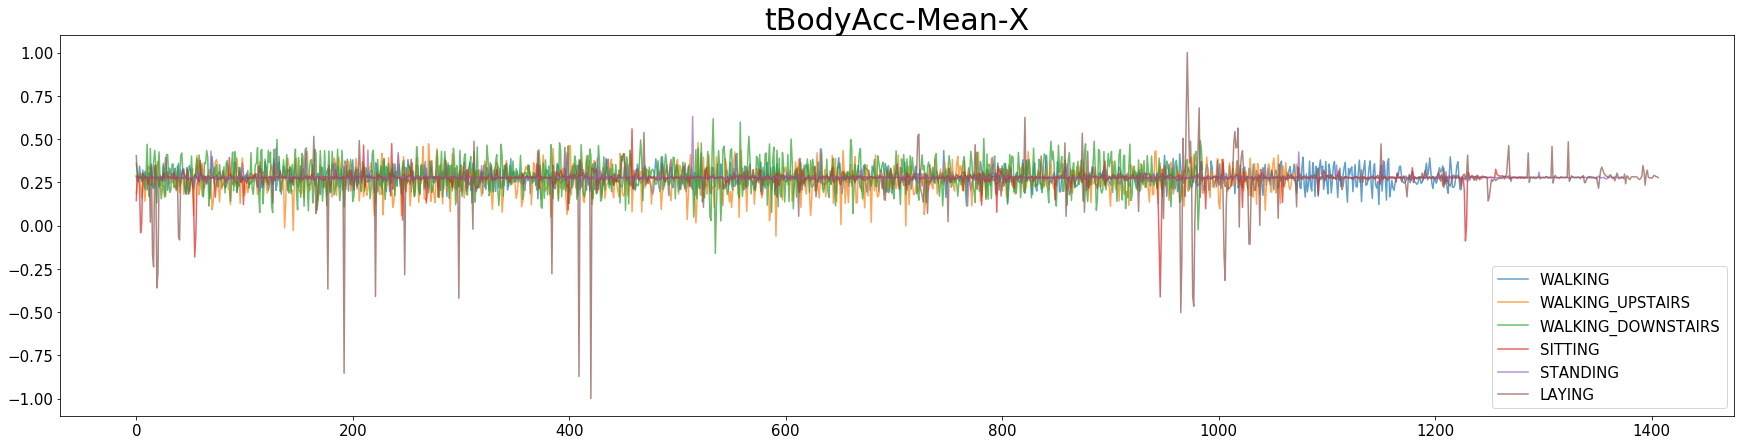

In [63]:
fig, ax = plt.subplots(figsize=(30,7))
# Recreating the derived feature tBodyAcc-X
## get the mean
mean_x = body_acc_x.mean(axis=1)
## normalize the mean betweeen 1 and -1
norm_mean_x = np.array([(2*(i-min(mean_x))/(max(mean_x)-min(mean_x)))-1 for i in mean_x])
#separate tBodyAcc by activity 
norm_mean_x_activity=[]
for i in range(1,7):
    mask=[df_y_train[0]==i]
    norm_mean_x_activity.append(norm_mean_x[np.logical_and.reduce(mask)])
#plot tBodyAcc-X for all the activities
for i in range(len(norm_mean_x_activity)):
    plt.plot(norm_mean_x_activity[i],alpha=0.7,label=activity_labels[1][i])
    #plt.plot(df_x_train_activity[i].iloc[:,0].values,label='original',alpha=1 ,color='orange') #to compare to derived dataset given
plt.legend(prop={'size':15})
plt.tick_params(labelsize=15)
plt.title('tBodyAcc-Mean-X',fontsize=30)
plt.show()
#hard to distinguish between activities

It appears difficult to distinguish between the difference activities based on the derived feature: tBodyAcc-Mean

#### Recreating and Investigating the property: tBodyAcc-Mean for Y axis

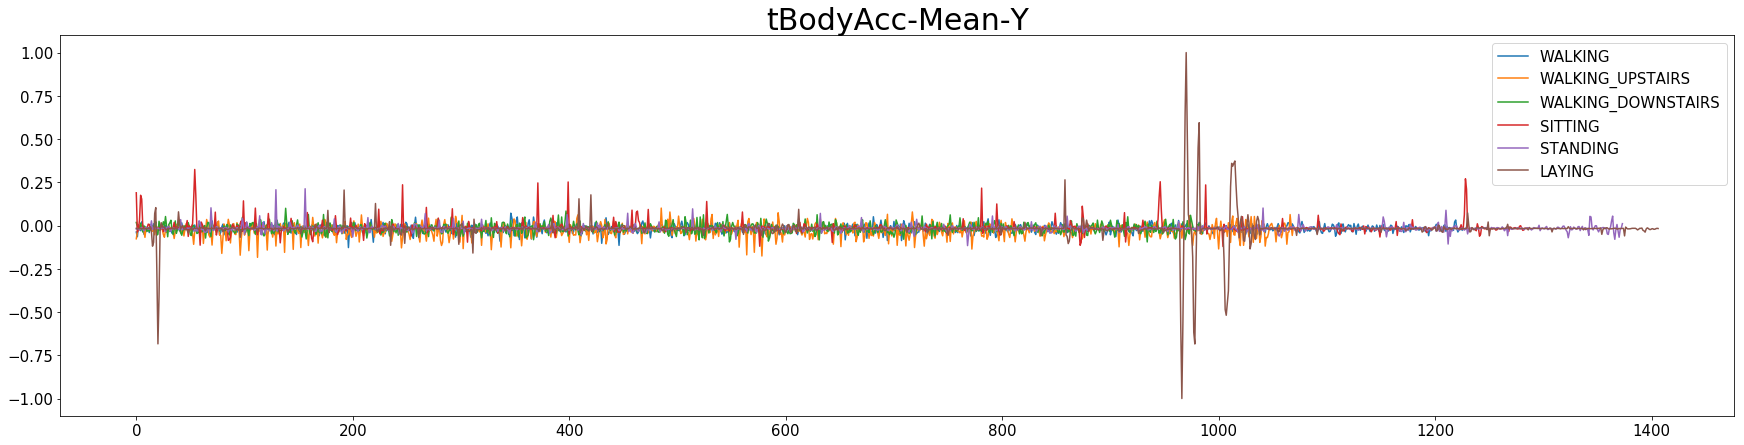

In [62]:
fig, ax = plt.subplots(figsize=(30,7))
mean_y = body_acc_y.mean(axis=1)
norm_mean_y = np.array([(2*(i-min(mean_y))/(max(mean_y)-min(mean_y)))-1 for i in mean_y])
norm_mean_y_activity=[]
for i in range(1,7):
    mask=[df_y_train[0]==i]
    norm_mean_y_activity.append(norm_mean_y[np.logical_and.reduce(mask)])
#plot tBodyAcc-Y for all activities
for i in range(len(norm_mean_y_activity)):
    plt.plot(norm_mean_y_activity[i],alpha=0.7,label=activity_labels[1][i])
    #plt.plot(df_x_train_activity[i].iloc[:,1].values,label='original',alpha=1, color='orange') #to compare to derived dataset given entire graph should appear orange
plt.legend(prop={'size':15})
plt.tick_params(labelsize=15)
plt.title('tBodyAcc-Mean-Y',fontsize=30)
plt.show()
#can distingui sitting


Due to the large spikes, it is easy to distinguish Laying from all the other activities based on the derived feature: tBodyAcc-Mean for the Y axis. However we cannot distinguish between the other five activities. 

#### Recreating and Investigating the derived feature: tBodyAcc-Mean for Z axis

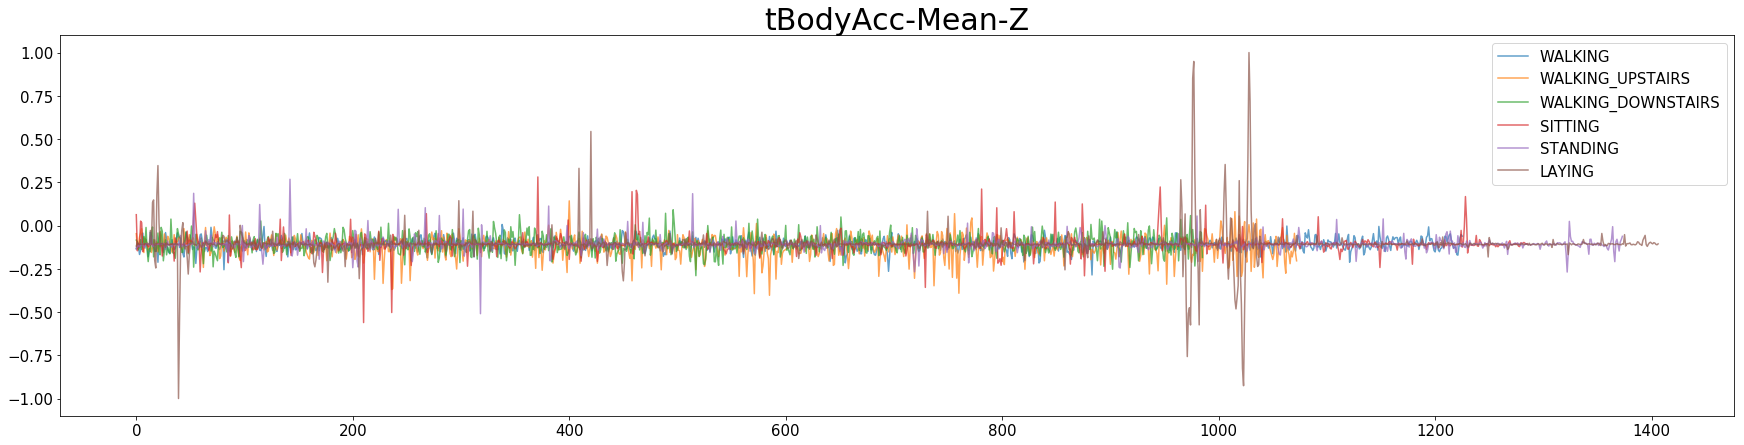

In [65]:
fig, ax = plt.subplots(figsize=(30,7))
mean_z = body_acc_z.mean(axis=1)
norm_mean_z = np.array([(2*(i-min(mean_z))/(max(mean_z)-min(mean_z)))-1 for i in mean_z])
norm_mean_z_activity=[]
for i in range(1,7):
    mask=[df_y_train[0]==i]
    norm_mean_z_activity.append(norm_mean_z[np.logical_and.reduce(mask)])
#plot tBodyAcc-Y for all activities
for i in range(len(norm_mean_z_activity)):
    plt.plot(norm_mean_z_activity[i],alpha=0.7,label=activity_labels[1][i])
    #plt.plot(df_x_train_activity[i].iloc[:,2].values,label='original',alpha =1, color='orange') #to compare to derived dataset given, entire graph shold appear orange
plt.legend(prop={'size':15})
plt.tick_params(labelsize=15)
plt.title('tBodyAcc-Mean-Z',fontsize=30)
plt.show()

As is the case for tBodyAcc-Mean-Y we can distinguish laying from the other 5 activities because of the large spikes, however it is not easy to distinguish between the five activities.

#### Recreating and Investigating the derived feature: tBodyAcc-Std for X axis

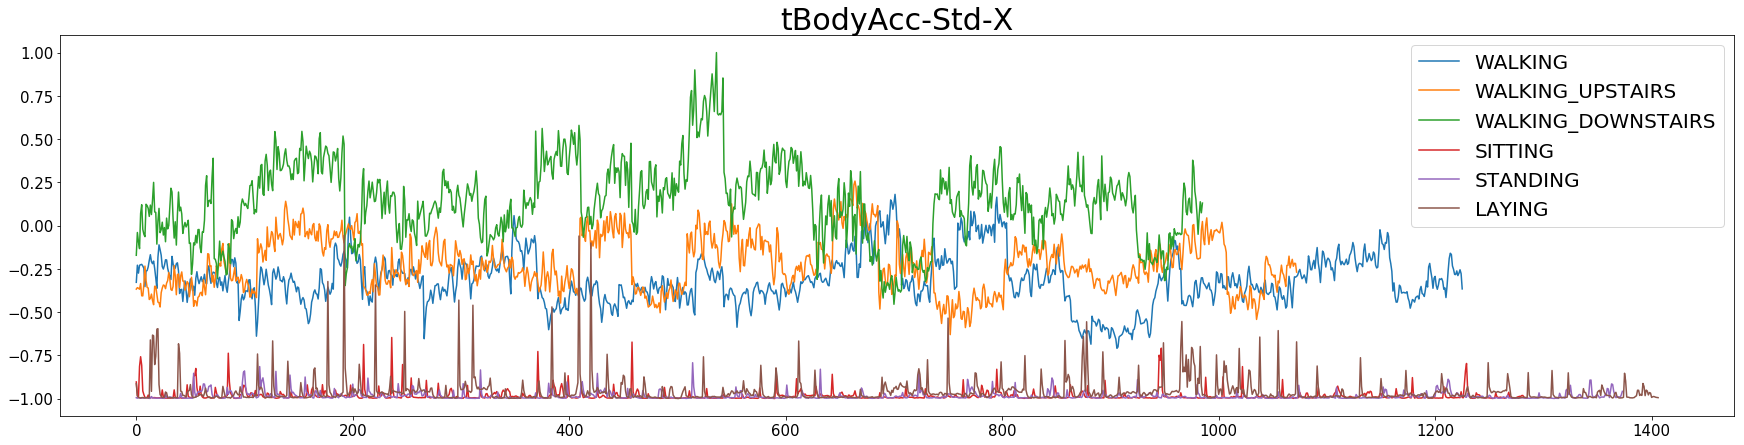

In [67]:
fig, ax = plt.subplots(figsize=(30,7))
std_x = body_acc_x.std(axis=1)
norm_std_x = np.array([(2*(i-min(std_x))/(max(std_x)-min(std_x)))-1 for i in std_x])
#separate std-X by activity
norm_std_x_activity=[]
for i in range(1,7):
    mask=[df_y_train[0]==i]
    norm_std_x_activity.append(norm_std_x[np.logical_and.reduce(mask)])
#plot StdBody-X for all activities
for i in range(len(norm_std_x_activity)):
    plt.plot(norm_std_x_activity[i],alpha=1,label=activity_labels[1][i])
    #plt.plot(df_x_train_activity[i].iloc[:,3].values,label='original',alpha =1, color='orange') #to check with derived dataset given
#standard devisation of X axis is in column 4
plt.legend(prop={'size':20})
plt.tick_params(labelsize=15)
plt.title('tBodyAcc-Std-X',fontsize=30)
plt.show()
#can distinguish between walking downstairs, walking upstairs, walking and laying

Becuase of the differnece in magnitudes we can visually distinguish between walking downstairs, walking upstairs, walking, Standing & laying. 
However since tBodyAcc-Std-X of Standing and laying are mostly -1, it is hard to disntinguish betweeen the two activiies based on this derived feature alone.

#### Recreating and Investigating the derived feature: tBodyAcc-Std for Y axis

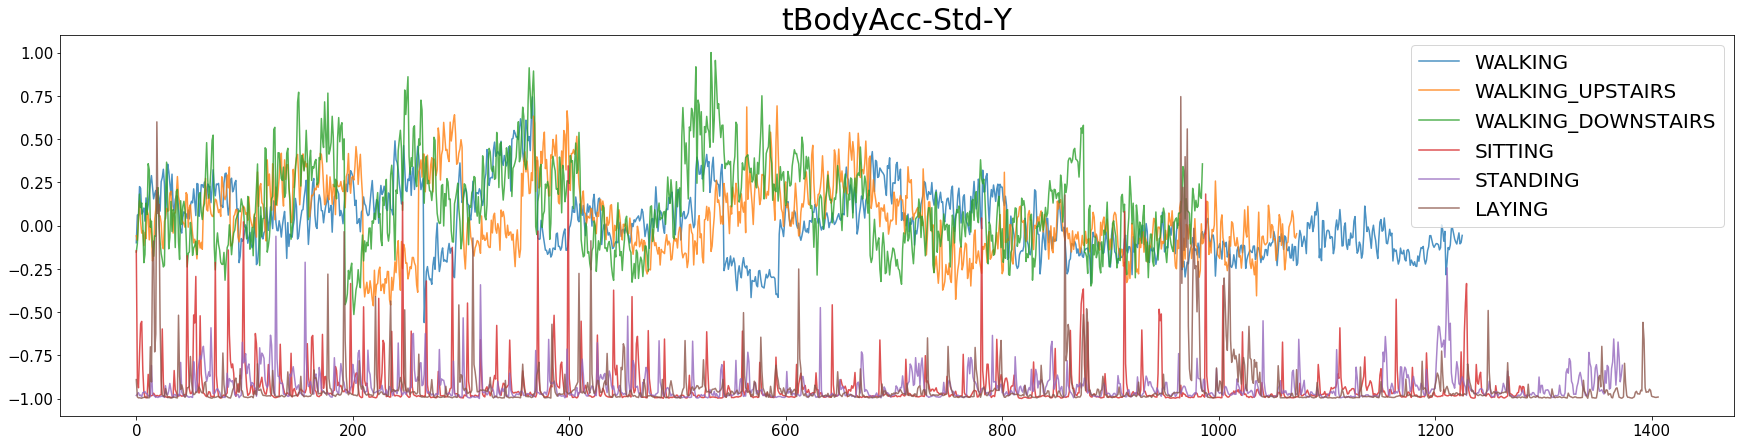

In [68]:
fig, ax = plt.subplots(figsize=(30,7))
std_y = body_acc_y.std(axis=1)
norm_std_y = np.array([(2*(i-min(std_y))/(max(std_y)-min(std_y)))-1 for i in std_y])
#separate std-Y by activity
norm_std_y_activity=[]
for i in range(1,7):
    mask=[df_y_train[0]==i]
    norm_std_y_activity.append(norm_std_y[np.logical_and.reduce(mask)])
for i in range(len(norm_std_y_activity)):
    plt.plot(norm_std_y_activity[i],alpha=0.8,label=activity_labels[1][i])
    #plt.plot(df_x_train_activity[i].iloc[:,4].values,label='original',alpha =1, color='orange') #to check with derived dataset given
#standard devisation of X axis is in column 4
plt.legend(prop={'size':20})
plt.tick_params(labelsize=15)
plt.title('tBodyAcc-Std-Y',fontsize=30)
plt.show()
#can distinguish between walking (upstairs, downstairs, walking) & sitting, standing, laying

Visually, one can distinguish between walking (upstairs, downstairs, walking) and sitting, standing, laying. However due to the similiar general shape, it is hard to distinguish between walking upstairs, walking downstairs and walking. It is also difficult to differentiate between sitting, standing and laying.

#### Recreating and Investigating the derived feature: tBodyAcc-Std for Z axis

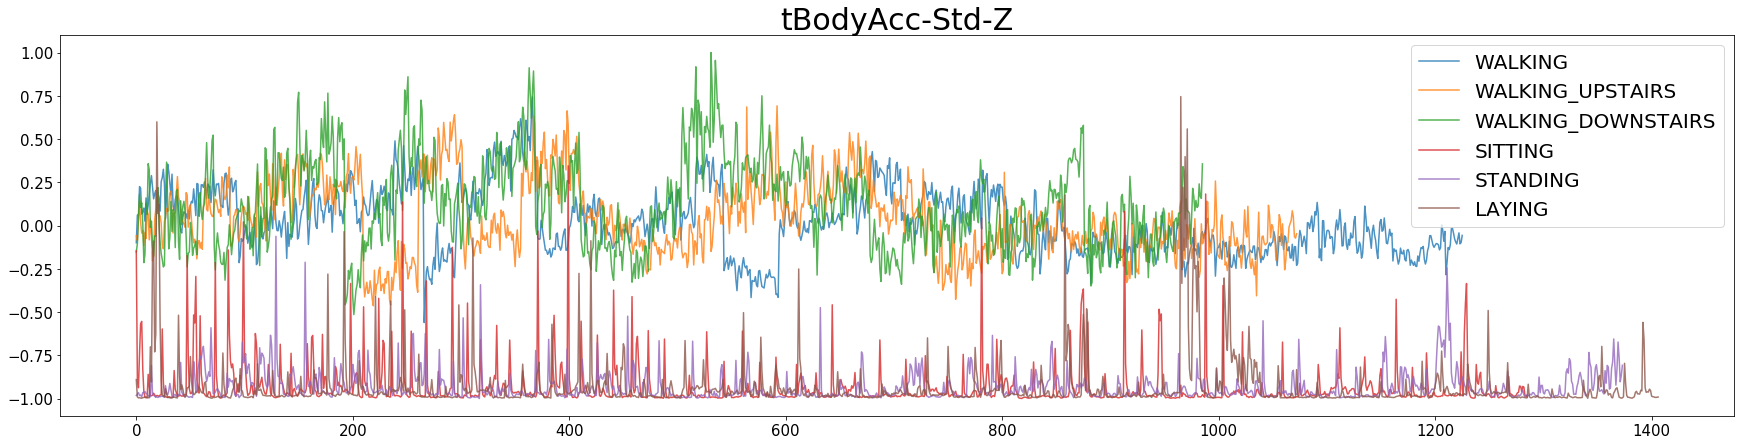

In [70]:
fig, ax = plt.subplots(figsize=(30,7))
std_z = body_acc_y.std(axis=1)
norm_std_z = np.array([(2*(i-min(std_z))/(max(std_z)-min(std_z)))-1 for i in std_z])
#separate std-Z by activity
norm_std_z_activity=[]
for i in range(1,7):
    mask=[df_y_train[0]==i]
    norm_std_z_activity.append(norm_std_z[np.logical_and.reduce(mask)])
for i in range(len(norm_std_z_activity)):
    plt.plot(norm_std_z_activity[i],alpha=0.8,label=activity_labels[1][i])
    #plt.plot(df_x_train_activity[i].iloc[:,5].values,label='original',alpha =1, color='orange') #to check with derived dataset given
#standard devisation of X axis is in column 4
plt.legend(prop={'size':20})
plt.tick_params(labelsize=15)
plt.title('tBodyAcc-Std-Z',fontsize=30)
plt.show()

Like tBodyAcc-Y one can distinguish between walking (upstairs, downstairs, walking) and sitting, standing, laying. However it is hard to differentiate between walking upstairs, walking downstairs, walking and between sitting,standing and laying

#### Recreating and investigating the derived feature: Signal Magnitude Area 

Reference for calculating signal magnitude area is found here: <br/> https://pdfs.semanticscholar.org/c4d7/1ccd99d5c0b313111ca92f3399e903db35c7.pdf <br/>

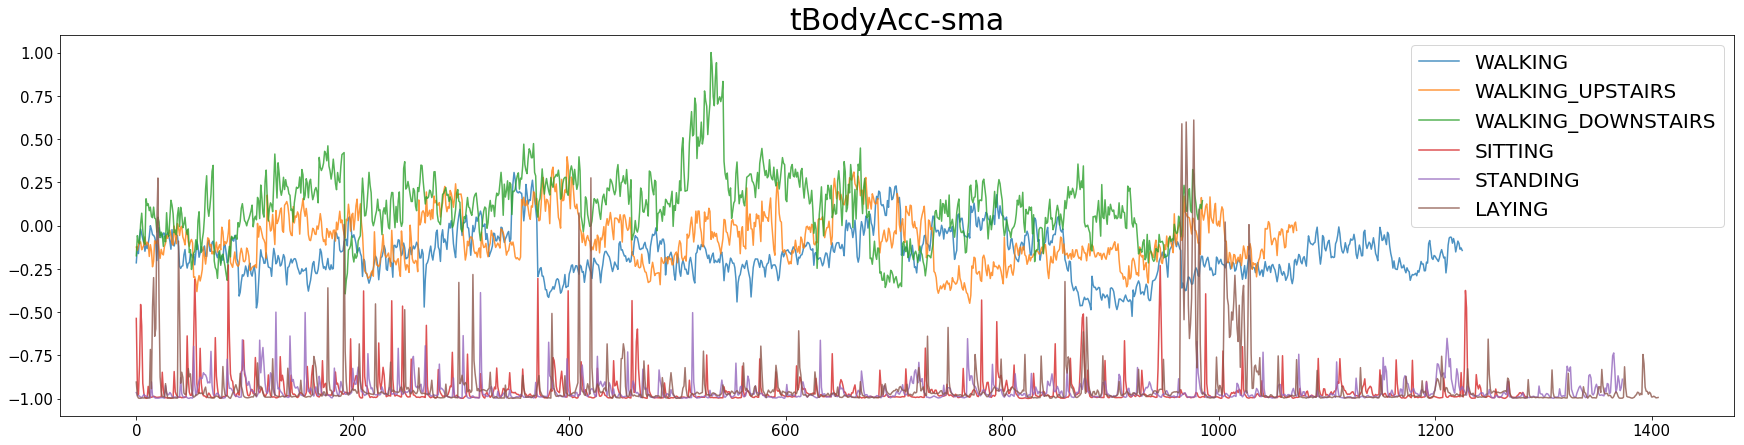

In [72]:
### signal magnitude area ### 
body_acc_xyz = body_acc_x.abs()+body_acc_y.abs()+body_acc_z.abs()
fig, ax = plt.subplots(figsize=(30,7))
bodyAcc_sma = body_acc_xyz.sum(axis=1)/128
norm_sma = np.array([(2*(i-min(bodyAcc_sma))/(max(bodyAcc_sma)-min(bodyAcc_sma)))-1 for i in bodyAcc_sma])
norm_sma_activity=[]
for i in range(1,7):
    mask=[df_y_train[0]==i]
    norm_sma_activity.append(norm_sma[np.logical_and.reduce(mask)])
for i in range(len(norm_sma_activity)):
    plt.plot(norm_sma_activity[i],alpha=0.8,label=activity_labels[1][i])
    #plt.plot(df_x_train_activity[i].iloc[:,15].values,label='original',alpha =1, color='orange') #to check with derived dataset given
plt.legend(prop={'size':20})
plt.tick_params(labelsize=15)
plt.title('tBodyAcc-sma',fontsize=30)
plt.show()


Similarly, one can differentiate between walking and non-walking activities based on the shape of the graph.
Based on the general shape of the graph, one can distinguish walking downstairs between walking and walking upstairs. You can also distinguish laying between sitting and standing based on Signal Magnitude Area 